In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [271]:
data = pd.read_excel(".\\data\\one_well_test.xlsx")

In [272]:
data.head()

,date,hours_online,WHT_degC,WHP_bar,DHT_degC,DHP_bar,platform_choke_perc,oil_m3,gas_m3,produced_water_m3
0,2001-04-08,6.0,50.833367,113.969772,95.173012,150.926854,NaN,0.0,0.0,5.977039
1,2001-04-09,0.0,7.873600,1.013526,92.106600,39.609044,NaN,0.0,0.0,0.000000
2,2001-04-10,0.0,7.873600,1.013526,92.106600,38.223179,NaN,0.0,0.0,0.000000
3,2001-04-11,0.0,7.873600,1.013526,92.106600,43.788237,NaN,0.0,0.0,0.000000
4,2001-04-12,0.0,7.873600,1.013526,92.106600,44.234532,NaN,0.0,0.0,0.000000


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6922 entries, 0 to 6921
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 6922 non-null   datetime64[ns]
 1   hours_online         6905 non-null   float64       
 2   WHT_degC             6837 non-null   float64       
 3   WHP_bar              6034 non-null   float64       
 4   DHT_degC             6723 non-null   float64       
 5   DHP_bar              6712 non-null   float64       
 6   platform_choke_perc  1835 non-null   float64       
 7   oil_m3               6905 non-null   float64       
 8   gas_m3               6905 non-null   float64       
 9   produced_water_m3    6905 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 540.9 KB


In [161]:
data["oil_m3"].mean()

150.55720804468967

In [162]:
nan_features = {}
for col in data.columns:
    nan_features[col] = data[col].isna().sum()
nan_features = pd.DataFrame(index=nan_features.keys(), columns=['na_count'], data=nan_features.values())

In [163]:
nan_features['percent of all data'] = round(nan_features['na_count']/data.shape[0] * 100, 2)

In [164]:
nan_features

,na_count,percent of all data
date,0,0.00
hours_online,17,0.25
WHT_degC,85,1.23
WHP_bar,888,12.83
DHT_degC,199,2.87
DHP_bar,210,3.03
platform_choke_perc,5087,73.49
oil_m3,17,0.25
gas_m3,17,0.25
produced_water_m3,17,0.25


In [165]:
data = data[data['produced_water_m3'] >= 0]

In [166]:
data.shape

(6888, 10)

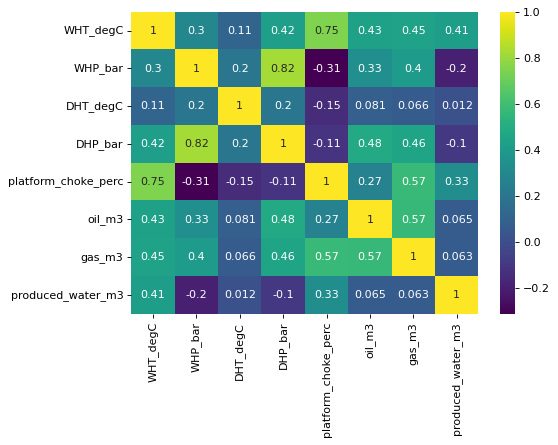

In [167]:
plt.figure(figsize=(7,5), dpi=80)
sns.heatmap(data.drop('hours_online', axis=1).corr(), cmap='viridis', annot=True);
# plt.xticks(rotation=60)

In [168]:
markers = ['oil_m3', 'gas_m3', 'produced_water_m3']
features = data.drop(['oil_m3', 'gas_m3', 'produced_water_m3'], axis=1).columns

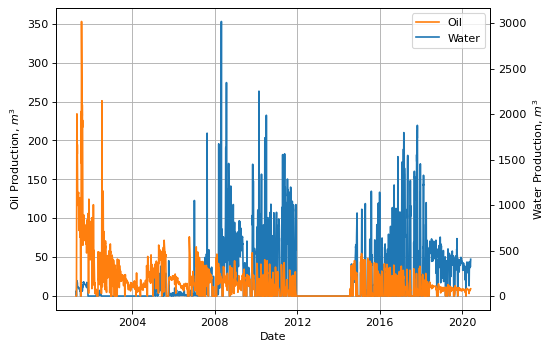

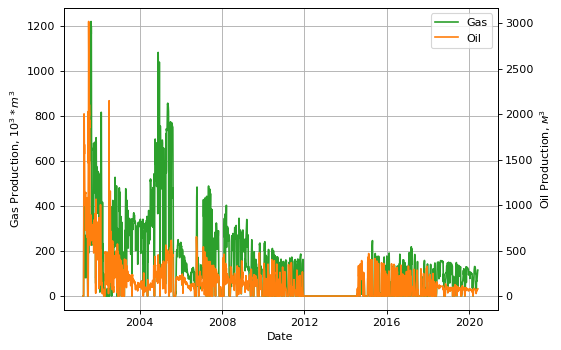

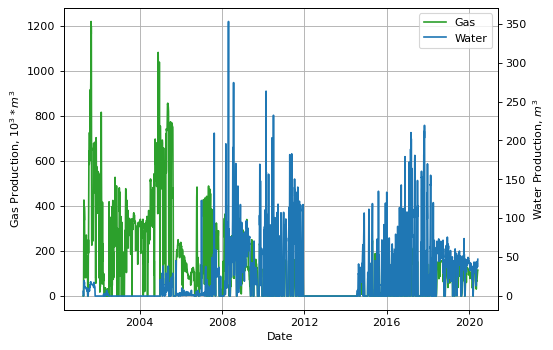

In [265]:
fig, ax1 = plt.subplots(1, 1, figsize=(7,5), dpi=80)
ax2 = ax1.twinx()
lns2 = ax1.plot(data['date'], data['produced_water_m3'].rolling(4, min_periods=1).mean(), color='tab:blue', label='Water')
lns1 = ax2.plot(data['date'], data['oil_m3'].rolling(4, min_periods=1).mean(), color='tab:orange', label='Oil')
ax1.set_xlabel('Date')
ax1.set_ylabel('Oil Production, $m^3$')
ax2.set_ylabel('Water Production, $m^3$')
ax1.grid()
lns = lns1 + lns2
labels = [i.get_label() for i in lns]
ax1.legend(lns, labels, loc='best')

fig, ax1 = plt.subplots(1, 1, figsize=(7,5), dpi=80)
ax2 = ax1.twinx()
lns2 = ax2.plot(data['date'], data['oil_m3'].rolling(4, min_periods=1).mean(), color='tab:orange', label='Oil')
lns1 = ax1.plot(data['date'], data['gas_m3'].rolling(4, min_periods=1).mean()/1000, color='tab:green', label='Gas')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gas Production, $10^3 * m^3$')
ax2.set_ylabel('Oil Production, $м^3$')
ax1.grid()
lns = lns1 + lns2
labels = [i.get_label() for i in lns]
ax1.legend(lns, labels, loc='best')

fig, ax1 = plt.subplots(1, 1, figsize=(7,5), dpi=80)
ax2 = ax1.twinx()
lns2 = ax2.plot(data['date'], data['produced_water_m3'].rolling(4, min_periods=1).mean(), color='tab:blue', label='Water')
lns1 = ax1.plot(data['date'], data['gas_m3'].rolling(4, min_periods=1).mean()/1000, color='tab:green', label='Gas')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gas Production, $10^3 * m^3$')
ax2.set_ylabel('Water Production, $m^3$')
ax1.grid()
lns = lns1 + lns2
labels = [i.get_label() for i in lns]
ax1.legend(lns, labels, loc='best')

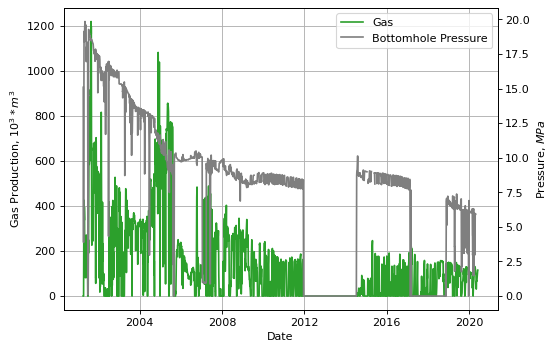

In [268]:
fig, ax1 = plt.subplots(1, 1, figsize=(7,5), dpi=80)
ax2 = ax1.twinx()
lns2 = ax2.plot(data['date'], data['DHP_bar'].rolling(4, min_periods=1).mean()/10, color='tab:grey', label='Bottomhole Pressure')
lns1 = ax1.plot(data['date'], data['gas_m3'].rolling(4, min_periods=1).mean()/1000, color='tab:green', label='Gas')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gas Production, $10^3 * m^3$')
ax2.set_ylabel('Pressure, $МPa$')
ax1.grid()
lns = lns1 + lns2
labels = [i.get_label() for i in lns]
ax1.legend(lns, labels, loc='best')

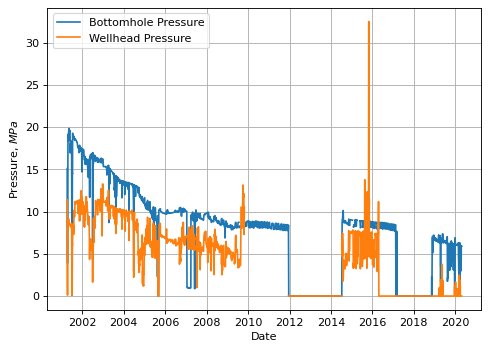

In [269]:
plt.figure(figsize=(7,5), dpi=80)
plt.plot(data['date'], data['DHP_bar'].rolling(4, min_periods=1).mean()/10, label='Bottomhole Pressure')
plt.plot(data['date'], data['WHP_bar'].rolling(4, min_periods=1).mean()/10, label='Wellhead Pressure')
plt.xlabel('Date')
plt.ylabel('Pressure, $MPa$')
plt.legend(loc='best')
plt.grid()

In [172]:
data["DHP_bar"].min()

0.0

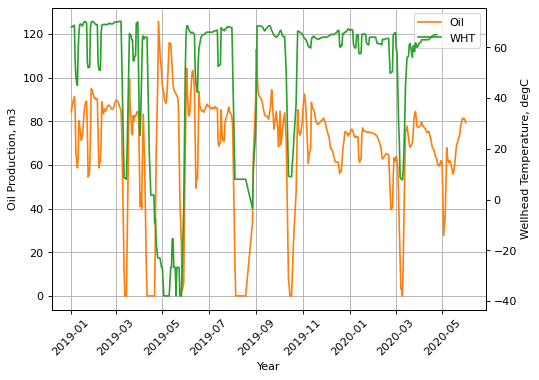

In [173]:
fig, ax1 = plt.subplots(1, 1, figsize=(7,5), dpi=80)
ax2 = ax1.twinx()
lns2 = ax2.plot(data[data['date'] > '2019']['date'], data[data['date'] > '2019']['WHT_degC'].rolling(4, min_periods=1).mean(), color='tab:green', label='WHT')
lns1 = ax1.plot(data[data['date'] > '2019']['date'], data[data['date'] > '2019']['oil_m3'].rolling(4, min_periods=1).mean(), color='tab:orange', label='Oil')
ax1.set_xlabel('Year')
ax1.set_ylabel('Oil Production, m3')
ax2.set_ylabel('Wellhead Temperature, degC')
ax1.grid()
lns = lns1 + lns2
labels = [i.get_label() for i in lns]
ax1.legend(lns, labels, loc='best')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

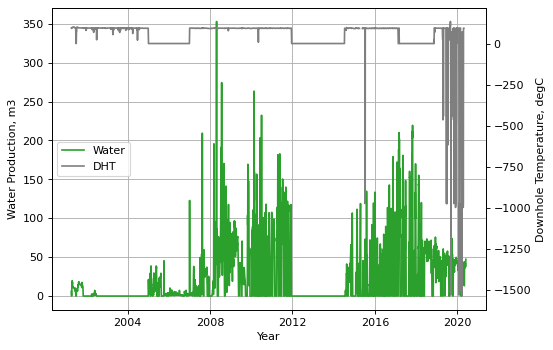

In [174]:
fig, ax1 = plt.subplots(1, 1, figsize=(7,5), dpi=80)
ax2 = ax1.twinx()
lns2 = ax2.plot(data['date'], data['DHT_degC'].rolling(4, min_periods=1).mean(), color='tab:grey', label='DHT')
lns1 = ax1.plot(data['date'], data['produced_water_m3'].rolling(4, min_periods=1).mean(), color='tab:green', label='Water')
ax1.set_xlabel('Year')
ax1.set_ylabel('Water Production, m3')
ax2.set_ylabel('Downhole Temperature, degC')
ax1.grid()
lns = lns1 + lns2
labels = [i.get_label() for i in lns]
ax1.legend(lns, labels, loc='center left')

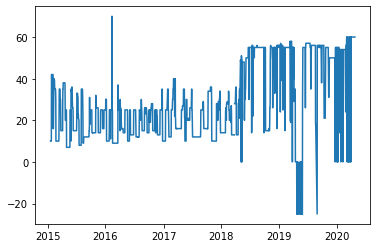

In [175]:
plt.plot(data['date'], data['platform_choke_perc'])

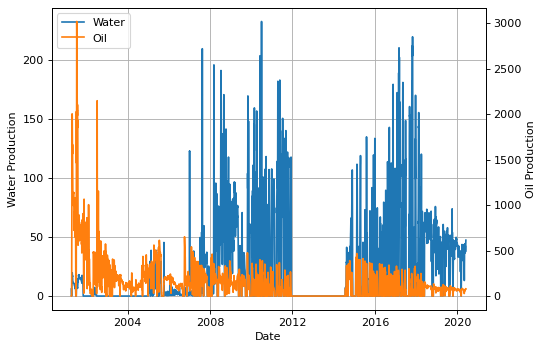

In [176]:
ig, ax1 = plt.subplots(1, 1, figsize=(7,5), dpi=80)
ax2 = ax1.twinx()
lns2 = ax2.plot(data[data['produced_water_m3'] < 500]['date'], data[data['produced_water_m3'] < 500]['oil_m3'].rolling(4, min_periods=1).mean(), color='tab:orange', label='Oil')
lns1 = ax1.plot(data[data['produced_water_m3'] < 500]['date'], data[data['produced_water_m3'] < 500]['produced_water_m3'].rolling(4, min_periods=1).mean(), color='tab:blue', label='Water')
ax1.set_xlabel('Date')
ax1.set_ylabel('Water Production')
ax2.set_ylabel('Oil Production')
ax1.grid()
lns = lns1 + lns2
labels = [i.get_label() for i in lns]
ax1.legend(lns, labels, loc='best')

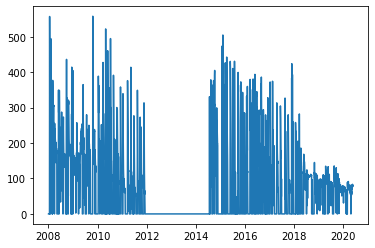

In [177]:
plt.plot(data[data['date'] > '2008']['date'], data[data['date'] > '2008']['oil_m3'])

In [178]:
for i in data.columns:
    print('Nonzero numbers of ' + i + ': ', np.count_nonzero(data[i].fillna(0)))

Nonzero numbers of date:  6888
Nonzero numbers of hours_online:  4778
Nonzero numbers of WHT_degC:  5127
Nonzero numbers of WHP_bar:  3695
Nonzero numbers of DHT_degC:  4340
Nonzero numbers of DHP_bar:  5060
Nonzero numbers of platform_choke_perc:  1787
Nonzero numbers of oil_m3:  4248
Nonzero numbers of gas_m3:  4224
Nonzero numbers of produced_water_m3:  3260


In [179]:
np.count_nonzero(data['hours_online'])

4778

In [180]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

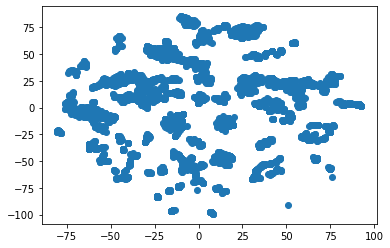

In [181]:
s_scaler = StandardScaler()
tsne = TSNE(random_state=17)
scaled_data = s_scaler.fit_transform(data.drop('date', axis=1).fillna(0))
tsne_repr = tsne.fit_transform(scaled_data)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1])

In [182]:
def nonzero_data(df):

    df = df[df['produced_water_m3'] < 500]
    # df = df[df['date'] > '2006']
    df = df.drop('date', axis=1)
    df = df.fillna(0)
    
    #for i in df.columns:
    #    if i != 'platform_choke_perc' and i != 'date':
    #        df[i] = df[i].replace(0, np.nan)
    #        df = df[df[i] >= 0]
    #        df = df.dropna(subset=[i])
    return df

In [183]:
df_choke = nonzero_data(data)

In [184]:
df_choke.reset_index(inplace=True)

In [185]:
df_choke.drop('index', axis=1, inplace=True)

### Some data transformation

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [187]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [188]:
df_choke.columns

Index(['hours_online', 'WHT_degC', 'WHP_bar', 'DHT_degC', 'DHP_bar',
       'platform_choke_perc', 'oil_m3', 'gas_m3', 'produced_water_m3'],
      dtype='object')

In [189]:
# Possible options: 'oil_m3', 'gas_m3', 'produced_water_m3'
target = 'oil_m3'
drop_cols = ['oil_m3', 'gas_m3', 'produced_water_m3', 'hours_online']

In [190]:
X, y = df_choke.drop(drop_cols, axis=1), np.array(df_choke[target].values).reshape(-1,)

In [191]:
y_all = df_choke[['oil_m3', 'gas_m3', 'produced_water_m3']]

In [192]:
y_all.shape, X.shape

((6885, 3), (6885, 5))

In [193]:
def clean_data(X):
    from sklearn.decomposition import PCA
    from sklearn.cluster import DBSCAN

    scaler = MinMaxScaler()
    pca = PCA()
    
    X_scaled = scaler.fit_transform(X)
    X_pca = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame(X_pca)
    
    clustering = DBSCAN(eps=0.5, min_samples=12).fit(X_pca)
    pca_df['DBSCAN'] = clustering.labels_ + 1
    clust_df = pca_df[pca_df['DBSCAN'] == 1]
    clust_df.drop('DBSCAN', axis=1, inplace=True)

    return clust_df.index

In [194]:
scaler = MinMaxScaler()
pca = PCA()

In [195]:
X_scaled = scaler.fit_transform(X)

In [196]:
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca)

In [197]:
clustering = DBSCAN(eps=0.5, min_samples=12).fit(X_pca)

In [198]:
pca_df['DBSCAN'] = clustering.labels_ + 1
clust_df = pca_df[pca_df['DBSCAN'] == 1]
clust_df.drop('DBSCAN', axis=1, inplace=True)
X.iloc[clust_df.index.tolist(), :].shape, X.shape

In [202]:
X_train, X_test, y_train, y_test = train_test_split(
    X.iloc[clust_df.index.tolist(), :], y[clust_df.index.tolist()], shuffle=True, random_state=17, test_size=.3
)
#X_train, X_test, y_train, y_test = X.iloc[:800], X.iloc[801:], y.iloc[:800], y.iloc[801:]

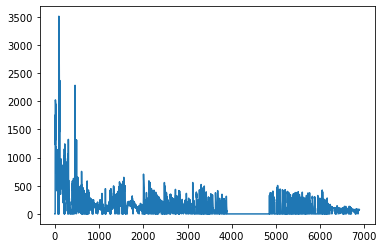

In [203]:
plt.plot(df_choke.iloc[clust_df.index.tolist(), 6])

In [204]:
X.iloc[clust_df.index.tolist(), :].shape, X.shape

((6840, 5), (6885, 5))

### Models comparison

In [205]:
lr = LinearRegression()

In [206]:
lr.fit(X_train, y_train)

LinearRegression()

In [207]:
mean_absolute_error(y_test, lr.predict(X_test)), r2_score(y_test, lr.predict(X_test))

(101.62894439683085, 0.3781771694191519)

In [208]:
rf = RandomForestRegressor(random_state=17)

In [209]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [210]:
rf_preds = rf.predict(X_test)

In [211]:
mean_absolute_error(y_test, rf_preds), r2_score(y_test, rf_preds)

(34.84670051622474, 0.8993357234722654)

### XGB tuning hyperparameters 

In [212]:
xgboost = xgb.XGBRegressor()

In [213]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [214]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'learning_rate': 0.01, 'max_depth': 10}
model = xgb.train(params, dtrain, 60)
predictions = model.predict(dtest)

In [215]:
mean_absolute_error(y_test, predictions), r2_score(y_test, predictions)

(88.77172245328347, 0.4601996221558705)

In [216]:
def score(params):
    print('Params:')
    print(params)
    params['max_depth'] = int(params['max_depth'])
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    model = xgb.train(params, dtrain, params['num_round'])
    predictions = model.predict(dtest)
    score = r2_score(y_test, predictions)
    print('\tScore {0}\n\n'.format(score))
    
    return {'loss': -score, 'params': params, 'status': STATUS_OK}

In [217]:
def optimize(trials):
    space = {
        'n_estimators': hp.quniform("n_estimators", 100, 2000, 10),
        'num_round': 100,
        'learning_rate': hp.quniform("eta", 0.005, 0.05, 0.005),
        'max_depth': hp.quniform("max_depth", 10, 15, 1),
        'min_child_weight': hp.quniform("min_child_weight", 1, 15, 1),
        'subsample': hp.quniform("subsample", 0.5, 1, 0.05),
        'gamma': hp.quniform("gamma", 0.5, 1, 0.01),
        'colsample_bytree': hp.quniform("colsample_bytree", 0.4, 1, 0.05),
        'nthread': 4,
        'silent': 1,
    }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=100)
    return best

In [218]:
trials = Trials()
best_params = optimize(trials)
best_params

Params:                                                
{'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.02, 'max_depth': 12.0, 'min_child_weight': 7.0, 'n_estimators': 660.0, 'nthread': 4, 'num_round': 100, 'silent': 1, 'subsample': 0.9}
[19:27:33] WARNING: ..\src\learner.cc:541:             
Parameters: { n_estimators, num_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


	Score 0.8543326167105587                              


Params:                                                                           
{'colsample_bytree': 0.4, 'gamma': 0.8300000000000001, 'learning_rate': 0.01, 'max_depth': 14.0, 'min_child_weight': 14.0, 'n_estimators': 120.0, 'nthread': 4, 'num_round': 100, 'silent': 1, 'subsample': 0.9500000000000001}
[19:27:37] WARNING: ..\

{'colsample_bytree': 0.8500000000000001,
 'eta': 0.05,
 'gamma': 0.89,
 'max_depth': 13.0,
 'min_child_weight': 2.0,
 'n_estimators': 1610.0,
 'subsample': 0.65}

In [219]:
best_params['max_depth'] = int(best_params['max_depth'])
best_params["nthread"] = 4
best_params["silent"] = 1

In [220]:
dtrain = xgb.DMatrix(X_train, y_train)

In [250]:
%%time
xgbCvResult = xgb.cv(
    best_params, dtrain, num_boost_round=500, nfold=3, early_stopping_rounds=70
)

[19:38:52] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:52] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:52] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you 

In [251]:
xgbCvResult

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,278.394959,3.817987,278.860708,7.589001
1,266.927999,3.445608,268.137441,8.028734
2,256.178442,3.277844,257.917984,8.201456
3,245.853556,3.073463,248.117747,8.011398
4,236.129278,3.105337,239.150482,7.602890
...,...,...,...,...
109,33.562866,0.898670,95.888364,1.627026
110,33.411667,0.893685,95.893778,1.576350
111,33.241631,0.882146,95.934227,1.567032
112,33.101458,0.886262,95.895287,1.557033


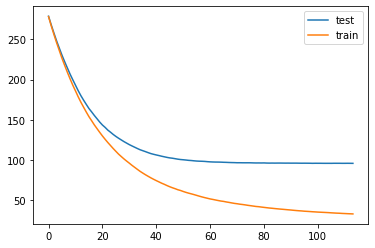

In [252]:
plt.plot(range(xgbCvResult.shape[0]), xgbCvResult["test-rmse-mean"], label='test')
plt.plot(range(xgbCvResult.shape[0]), xgbCvResult["train-rmse-mean"], label='train');
plt.legend()

In [253]:
best_num_round = np.argmin(xgbCvResult["test-rmse-mean"])
best_num_round

113

In [254]:
def df_results(hp_results):
    """
    Reprepresentation results of hyperopt as DataFrame format

    """ 

    results = pd.DataFrame([{**x, **x['params']} for x in  hp_results])
    results['loss'] = abs(results['loss'])
    results.drop(labels=['status', 'params'], axis=1, inplace=True)
    results.sort_values(by=['loss'], ascending=False, inplace=True)
    return results

results = df_results(trials.results)

In [255]:
bestXGB = xgb.train(best_params, dtrain, best_num_round)

[19:38:54] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [256]:
dtest = xgb.DMatrix(X_test)

In [257]:
XGBpred = bestXGB.predict(dtest)

In [258]:
mean_absolute_error(y_test, XGBpred), r2_score(y_test, XGBpred)

(35.60149076733745, 0.8988743241348626)

In [259]:
from sklearn.metrics import mean_absolute_percentage_error

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

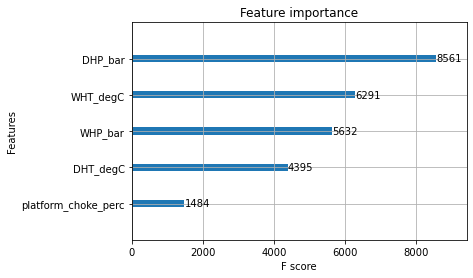

In [260]:
xgb.plot_importance(bestXGB)

(0.0, 3217.725971891203)

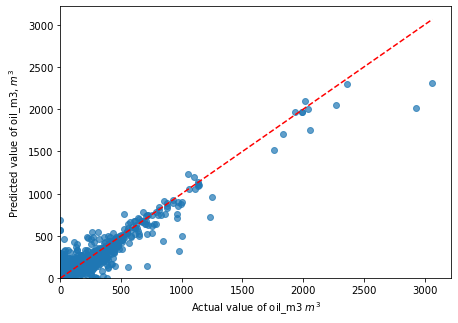

In [270]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, XGBpred, alpha=.7);
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--');
plt.xlabel(f'Actual value of {target} $m^3$')
plt.ylabel(f'Predicted value of {target}, $m^3$')
plt.xlim(left=0)
plt.ylim(bottom=0)

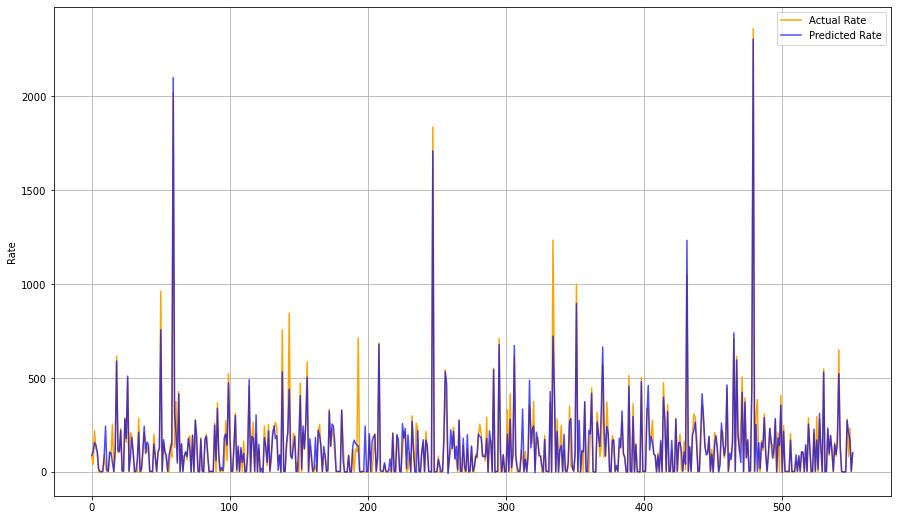

In [262]:
plt.figure(figsize=(15, 9))
plt.plot(y_test[1500:], color='orange', alpha=1, label='Actual Rate')
plt.plot(XGBpred[1500:], color='blue', alpha=.7, label='Predicted Rate')
plt.legend(loc='best')
plt.ylabel('Rate')
plt.grid()

In [263]:
import pickle

In [273]:
pkl_filename = f'xgb_{target}.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(bestXGB, file)